Sample Rate: 44100 Hz
Signal shape: (220500,)
Duration: 5.00 seconds


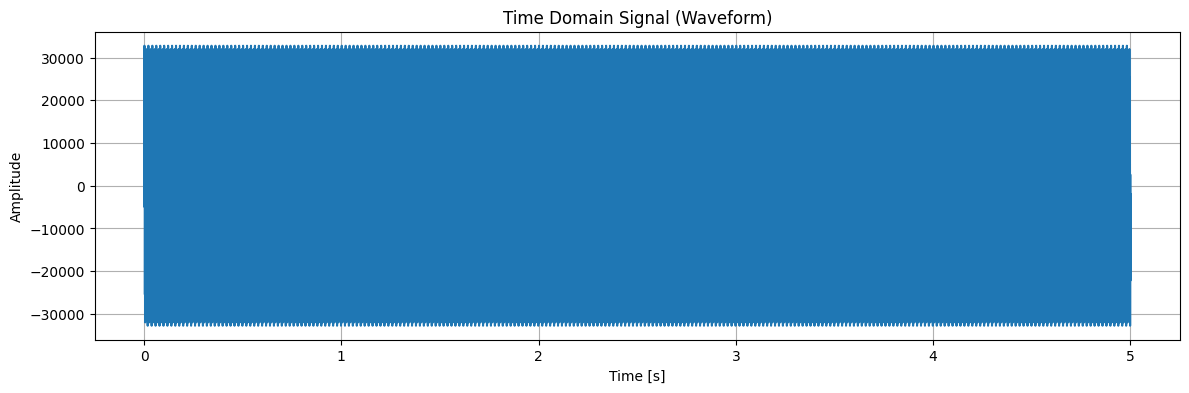

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file
sample_rate, signal = wavfile.read('mixed_q1.wav')  # Make sure this file is in your working directory

# Print basic info
print(f"Sample Rate: {sample_rate} Hz")
print(f"Signal shape: {signal.shape}")
print(f"Duration: {signal.shape[0] / sample_rate:.2f} seconds")

# If stereo (2 channels), convert to mono by averaging
if len(signal.shape) == 2:
    print("Sound is streo.")
    signal = signal.mean(axis=1)

# Create a time axis for plotting
time = np.linspace(0, len(signal)  / sample_rate, num=len(signal))

# Plot the waveform
plt.figure(figsize=(14, 4))
plt.plot(time, signal)
plt.title('Time Domain Signal (Waveform)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

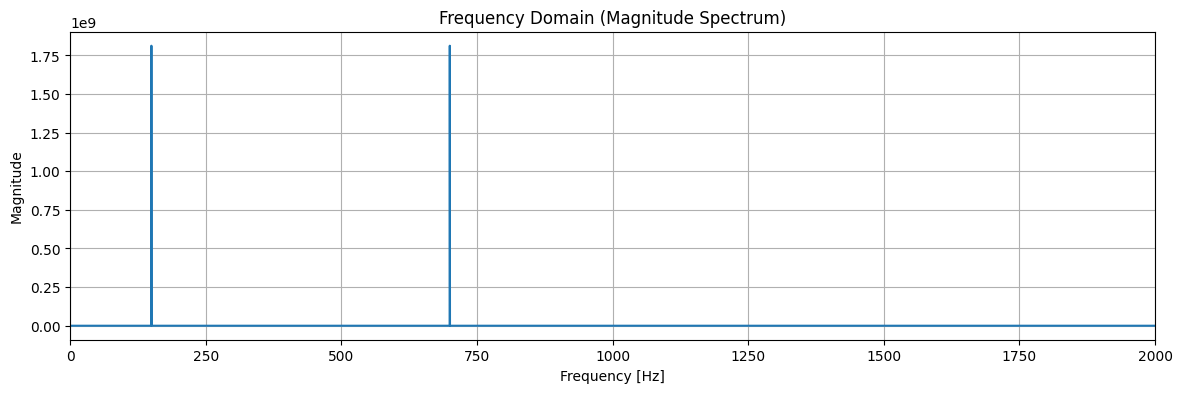

In [13]:
# Perform FFT
fft_spectrum = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(signal), d=1/sample_rate)

# Get the magnitude (absolute value of complex FFT result)
magnitude = np.abs(fft_spectrum)

# Plot only the positive half of frequencies
positive_freqs = fft_freq[:len(fft_freq)//2]
positive_magnitude = magnitude[:len(magnitude)//2]

plt.figure(figsize=(14, 4))
plt.plot(positive_freqs, positive_magnitude)
plt.title('Frequency Domain (Magnitude Spectrum)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 2000)  # Limit view to 0-2000 Hz to focus on voice/instrument
plt.show()

In [14]:
# Create bandpass masks
voice_mask = (np.abs(fft_freq) >= 100) & (np.abs(fft_freq) <= 250)
instrument_mask = (np.abs(fft_freq) >= 600) & (np.abs(fft_freq) <= 900)

# Apply masks
voice_fft = fft_spectrum * voice_mask
instrument_fft = fft_spectrum * instrument_mask

In [15]:
# Inverse FFT to get time domain signals
voice_signal = np.fft.ifft(voice_fft).real
instrument_signal = np.fft.ifft(instrument_fft).real

In [16]:
from scipy.io.wavfile import write

def normalize(signal):
    # Scale to 16-bit range
    signal = signal / np.max(np.abs(signal))
    return np.int16(signal * 32767)

# Normalize
voice_out = normalize(voice_signal)
instrument_out = normalize(instrument_signal)

# Save as new wav files
write("voice_separated.wav", sample_rate, voice_out)
write("instrument_separated.wav", sample_rate, instrument_out)

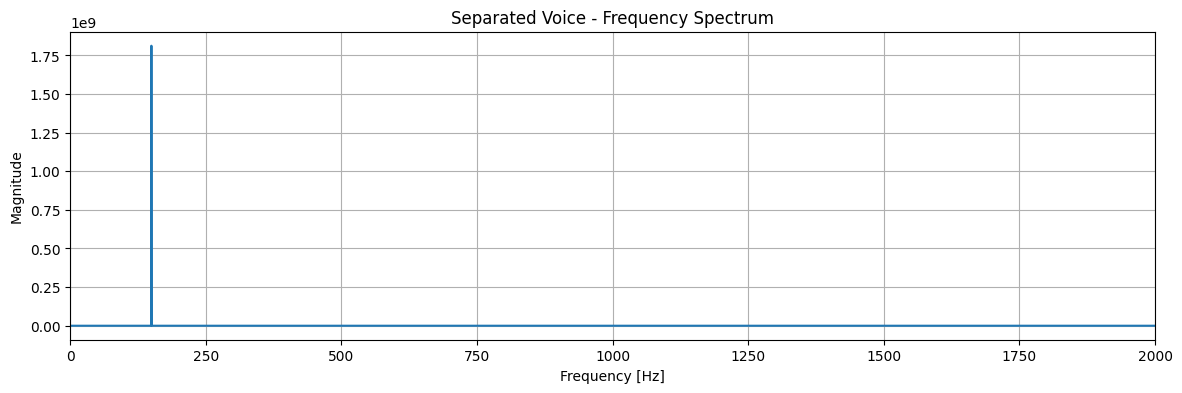

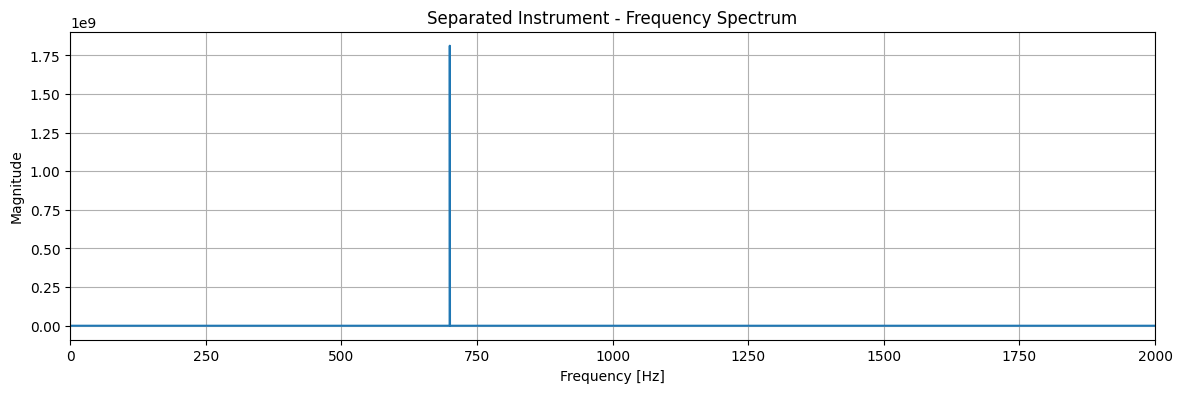

In [17]:
# Plot voice spectrum
voice_fft_mag = np.abs(np.fft.fft(voice_signal))[:len(voice_signal)//2]

plt.figure(figsize=(14, 4))
plt.plot(positive_freqs, voice_fft_mag)
plt.title('Separated Voice - Frequency Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 2000)
plt.show()

# Plot instrument spectrum
instrument_fft_mag = np.abs(np.fft.fft(instrument_signal))[:len(instrument_signal)//2]

plt.figure(figsize=(14, 4))
plt.plot(positive_freqs, instrument_fft_mag)
plt.title('Separated Instrument - Frequency Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 2000)
plt.show()